# Fundamentals of Learning


# Homework

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def fit_linear_regression(X, Y):
    """
    :param X: A numpy matrix, where each row is a data element (X)
    :param Y: A list of responses for each of the rows (y)
    :return: An array of parameters
    """
    N = np.size(X)
    X_Mean = np.mean(X)
    Y_Mean = np.mean(Y)
 
    F_XY = np.sum(Y * X - N * Y_Mean * X_Mean)
    F_XX = np.sum(X * X - N * X_Mean * X_Mean)
 
    a = F_XY / F_XX
    b = Y_Mean - a * X_Mean
 
    return(b, a)

In [46]:
def plot(X, Y, Param):

    plt.scatter(X, Y, color = "g", marker = "o", s = 30)
 
    Y_Predicted = Param[1] * X + Param[0]
 
    plt.plot(X, Y_Predicted, color = "m")
 
    plt.xlabel('X')
    plt.ylabel('Y')
 
    plt.show()

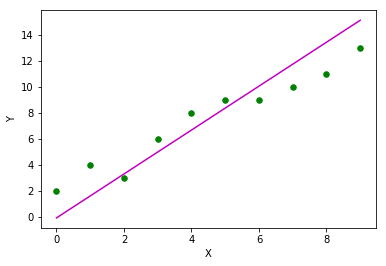

In [47]:
 def main():
    X = np.arange(10)
    Y = np.array([2, 4, 3, 6, 8, 9, 9, 10, 11, 13])
 
    Param = fit_linear_regression(X, Y)

    plot(X, Y, Param)
 
if __name__ == "__main__":
    main()

1
4.0


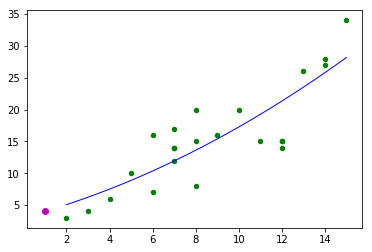

In [48]:
import math

X = np.array([2,3,4,6,7,8,5,8,9,10,6,7,12,8,7,7,11,12,12,13,14,14,15])
Y=np.array([3,4,6,7,12,15,10,20,16,20,16,17,15,8,14,14,15,14,15,26,27,28,34])

Params = np.polyfit(X, Y, 2)

a = Params[0]
b = Params[1]
c = Params[2]

x = np.linspace(np.min(X), np.max(X))   

y = a * x ** 2 + b * x + c 

X_Predicted = float(input())      
Y_Predicted = a * X_Predicted ** 2 + b * X_Predicted + c   

plt.scatter(X,Y, s=20, color="g" )      
plt.scatter(X_Predicted, Y_Predicted, color="m")    
plt.plot(x, y, color="b", linewidth=1)      

print(round(Y_Predicted,2))

In [49]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
df = pd.DataFrame({'x': np.random.uniform(size=1500),
     'y': np.random.uniform(size=1500)})

In [51]:
df.head()

,x,y
0,0.975143,0.546112
1,0.823112,0.183171
2,0.857508,0.624283
3,0.751008,0.587520
4,0.317447,0.852668


In [52]:
# Return a tuple representing the dimensionality of the DataFrame
datasize = df.shape[0]
# Split arrays into random train and test subsets
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= df.x[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ytest = df.y[itest].values

In [53]:
xtrain

array([0.70848407, 0.75780731, 0.70210814, 0.95369425, 0.94550163,
       0.83326343, 0.00225897, 0.82311221, 0.85750848, 0.61937613,
       0.31744664, 0.12424909, 0.95371776, 0.18107897, 0.92048309,
       0.88246513, 0.85378268, 0.24209465, 0.97514312, 0.3819945 ,
       0.75100789, 0.99368176, 0.34298796, 0.49396685])

In [54]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1)) # Generate polynomial and interaction features.
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

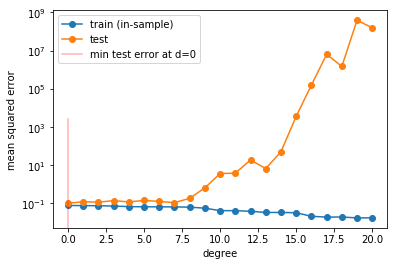

In [55]:
degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))

traintestlists=make_features(xtrain, xtest, degrees)

for d in degrees: # For increasing polynomial degrees 0,1,2...
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    # Set up model
    est = LinearRegression()
    # Fit
    est.fit(Xtrain, ytrain)
    # Predict
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    # Calculate mean squared error
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)

plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")